In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

  # Update the path accordingly


In [2]:
from google.colab import files


uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# Display basic information and the first few rows of the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Summary statistics for numerical features




In [5]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

# Count plot for the target variable 'Attrition'


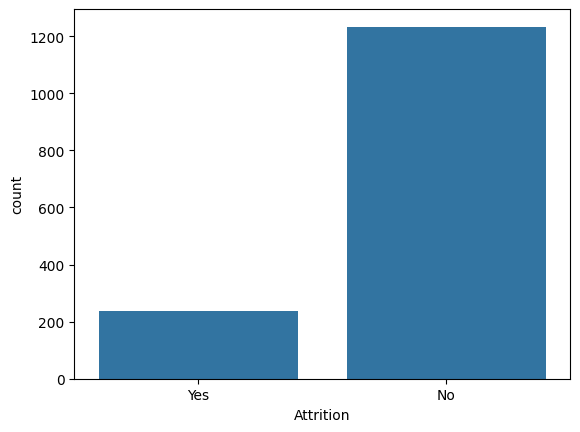

In [6]:
sns.countplot(x='Attrition', data=df)
plt.show()

# Visualize the distribution of numeric features


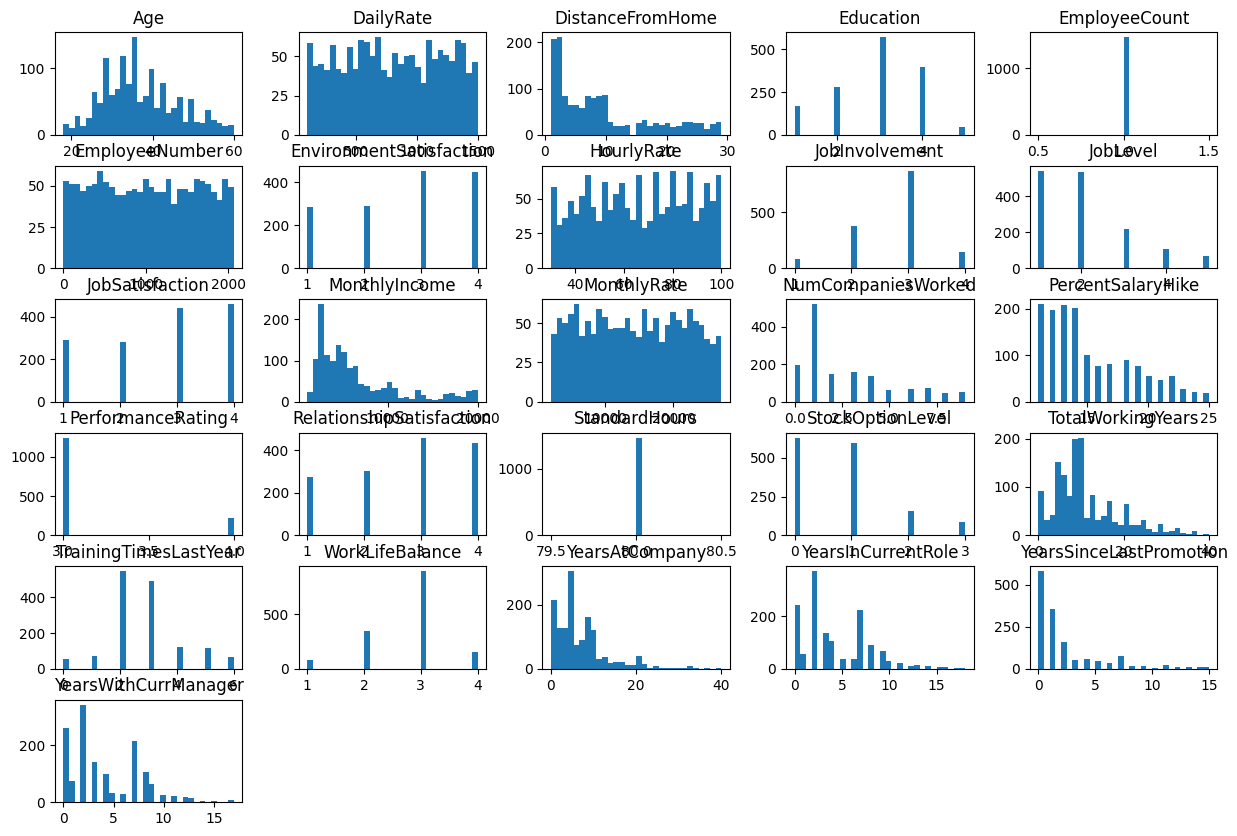

In [7]:
df.hist(bins=30, figsize=(15, 10), grid=False)
plt.show()

# Correlation matrix heatmap

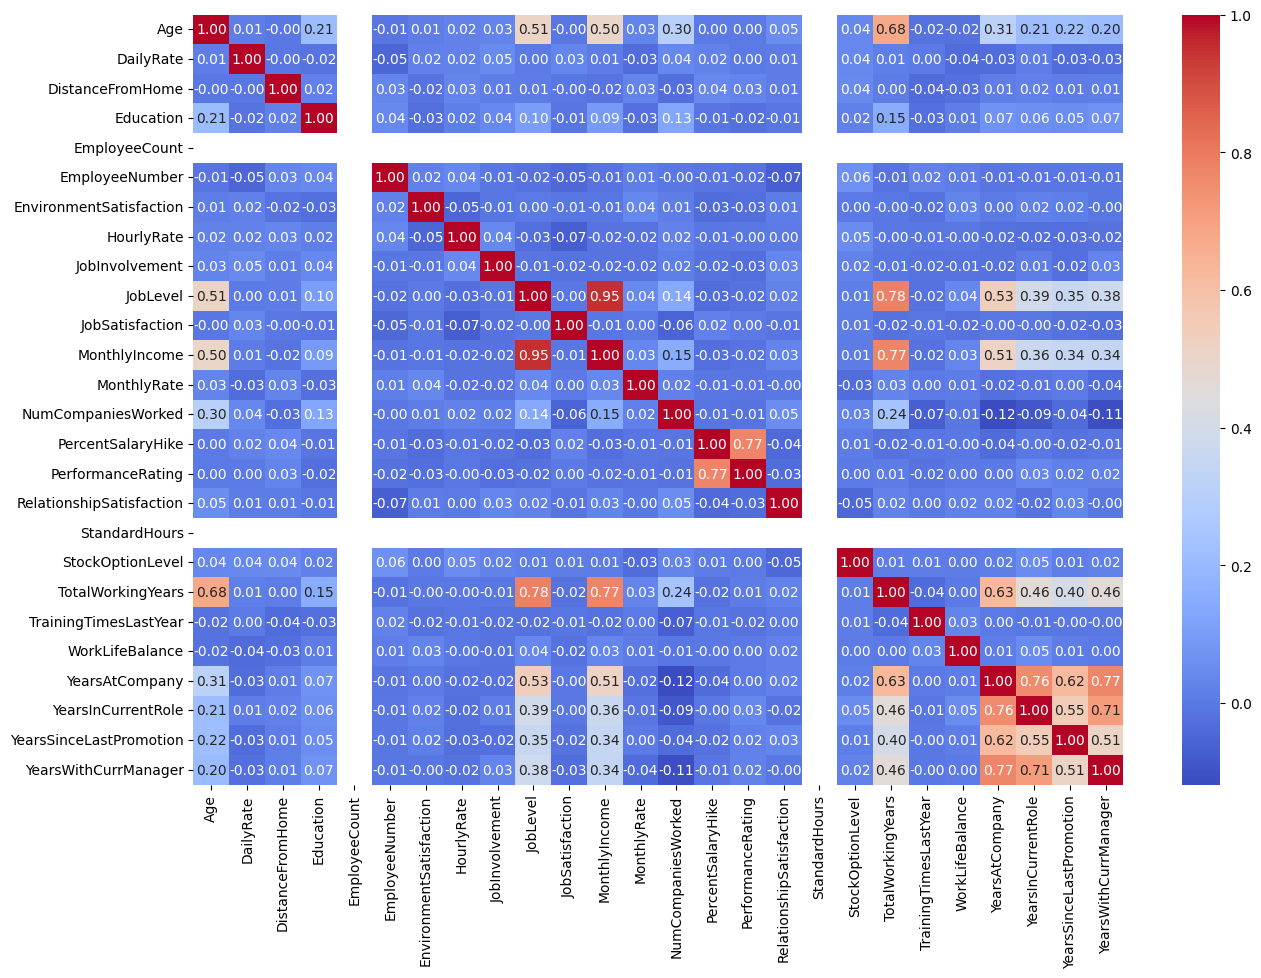

In [14]:
numeric_df = df.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()



#Exploratory Data Analysis

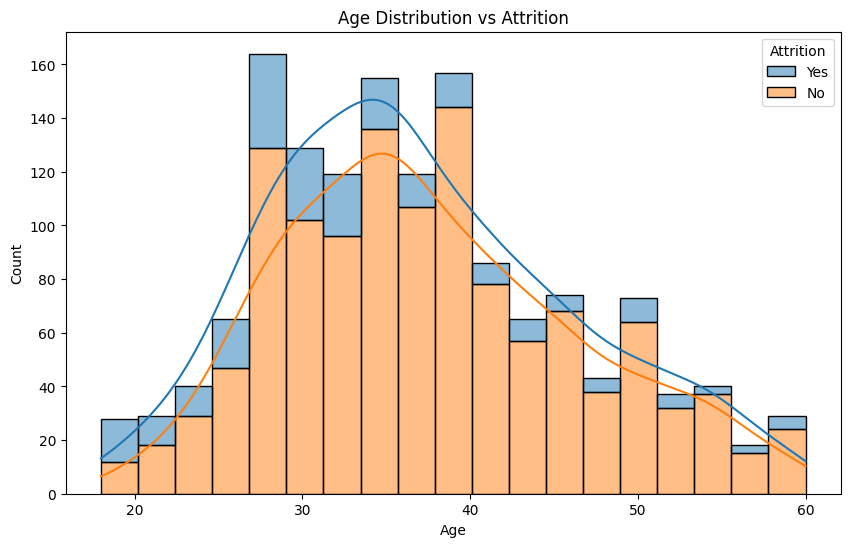

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Age Distribution vs Attrition')
plt.show()

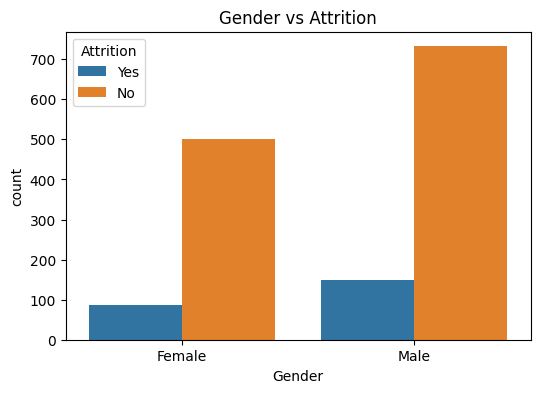

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Gender vs Attrition')
plt.show()


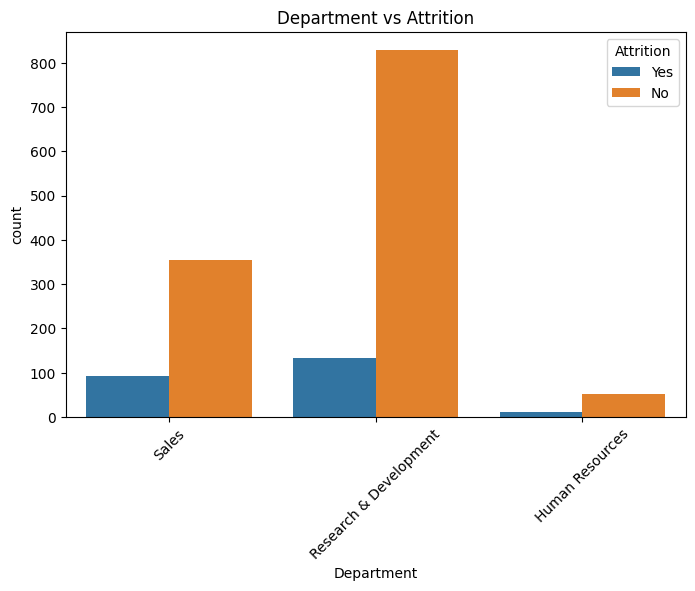

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Department vs Attrition')
plt.xticks(rotation=45)
plt.show()


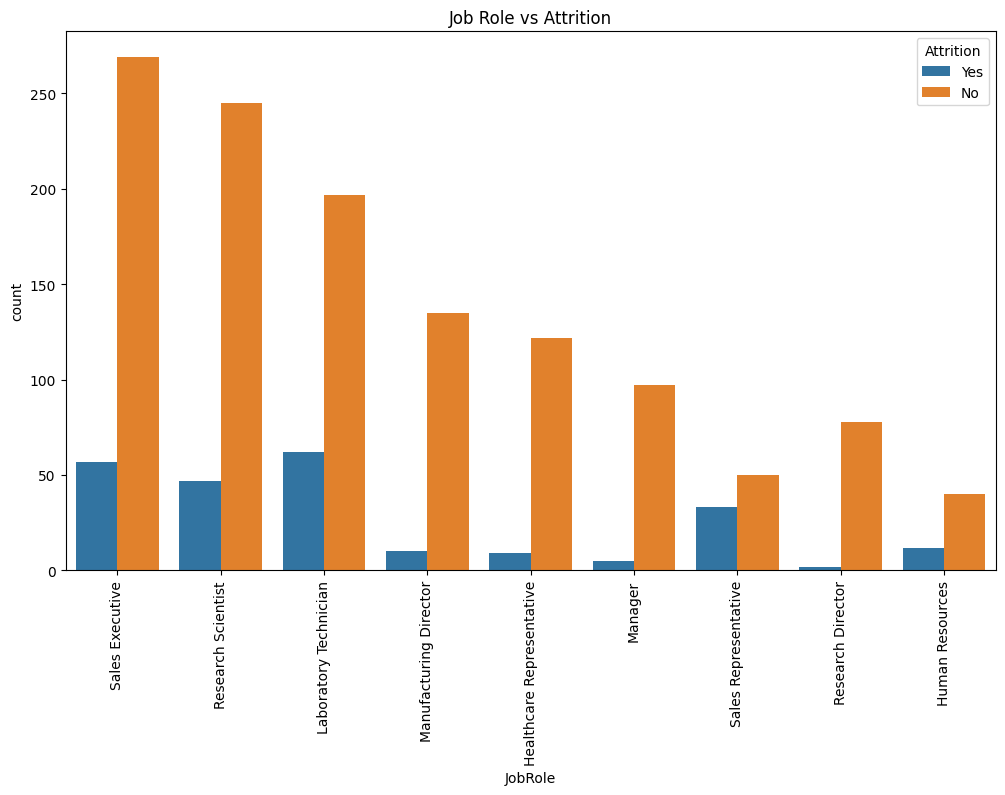

In [18]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title('Job Role vs Attrition')
plt.xticks(rotation=90)
plt.show()


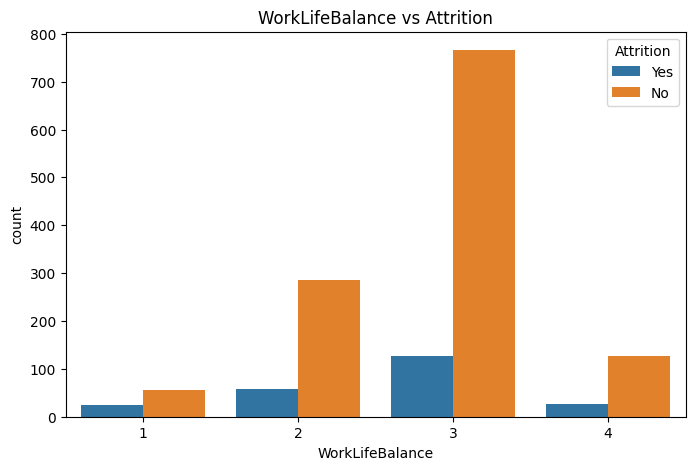

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('WorkLifeBalance vs Attrition')
plt.show()


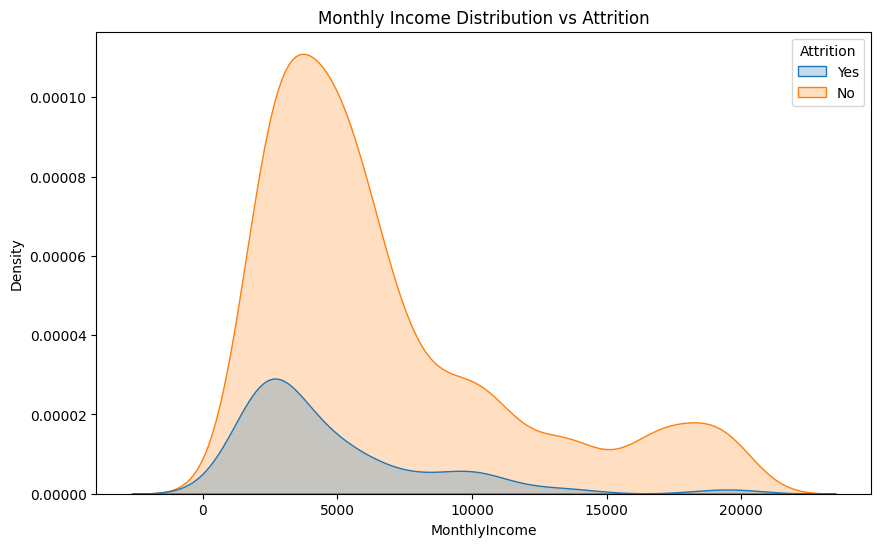

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyIncome', hue='Attrition', fill=True)
plt.title('Monthly Income Distribution vs Attrition')
plt.show()


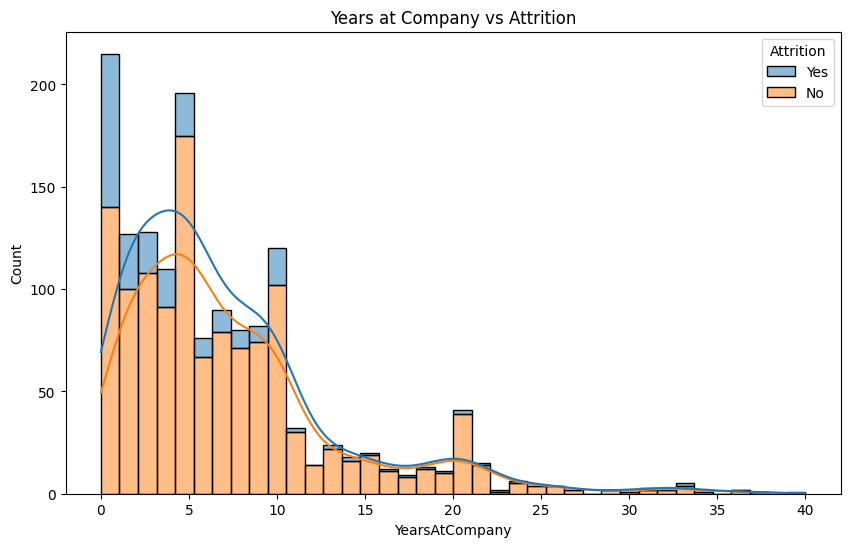

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', kde=True)
plt.title('Years at Company vs Attrition')
plt.show()


#Training and testing The model

In [22]:
# Assuming 'Attrition' is the target variable and it's binary (Yes/No)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Splitting dataset into features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encoding categorical variables and scaling numerical variables
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000),
}

results = {}

for name, model in models.items():
    # Pipeline for preprocessing and model training
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions)
    }

# Displaying performance metrics for each model
for result in results:
    print(f"{result}: {results[result]}")


Logistic Regression: {'Accuracy': 0.8945578231292517, 'Precision': 0.6428571428571429, 'Recall': 0.46153846153846156, 'F1 Score': 0.5373134328358209}
Decision Tree: {'Accuracy': 0.7653061224489796, 'Precision': 0.17391304347826086, 'Recall': 0.20512820512820512, 'F1 Score': 0.18823529411764706}
Random Forest: {'Accuracy': 0.8707482993197279, 'Precision': 0.5714285714285714, 'Recall': 0.10256410256410256, 'F1 Score': 0.17391304347826086}
Gradient Boosting: {'Accuracy': 0.8809523809523809, 'Precision': 0.6666666666666666, 'Recall': 0.20512820512820512, 'F1 Score': 0.3137254901960784}
SVM: {'Accuracy': 0.891156462585034, 'Precision': 1.0, 'Recall': 0.1794871794871795, 'F1 Score': 0.30434782608695654}
KNN: {'Accuracy': 0.8639455782312925, 'Precision': 0.4444444444444444, 'Recall': 0.10256410256410256, 'F1 Score': 0.16666666666666666}
Neural Network: {'Accuracy': 0.8673469387755102, 'Precision': 0.5, 'Recall': 0.41025641025641024, 'F1 Score': 0.4507042253521127}


In [27]:
# Example for tuning a Random Forest Classifier
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestClassifier())])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best accuracy: 0.8630941218896503


In [28]:
# Train the final model (example with Random Forest)
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

# Final evaluation
print(f"Final Model Accuracy: {accuracy_score(y_test, final_predictions)}")
print(classification_report(y_test, final_predictions))

Final Model Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294



In [29]:
import pickle

# Assuming 'final_model' is your trained model
pickle.dump(final_model, open('final_model.pkl', 'wb'))



In [30]:
!pip install flask_ngrok

In [31]:
!pip install joblib

In [32]:
import pickle

# Assuming 'final_model' is your trained model
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

    pickle.dump(final_model, file)


In [38]:
import numpy as np
import scipy as sp
import pandas as pd
from flask import Flask,request,jsonify,render_template
import pickle

app = Flask (__name__)
model = pickle.load (open ('final_model.pkl','rb'))


@app.route ('/')
def home():
    return render_template ('/content/templates/index.html')


@app.route ('/predict',methods=['POST','GET'])
def predict():
    """
    For rendering results on HTML GUI
    """
    Age = request.form.get ("Age")
    BusinessTravel = request.form['BusinessTravel']
    DailyRate = request.form.get ('Daily Rate')
    Department = request.form['Department']
    DistanceFromHome = request.form.get ("Distance From Home")
    Education = request.form.get ("Education")
    EducationField = request.form['Education Field']
    EnvironmentSatisfaction = request.form.get ("Environment Satisfaction")
    Gender = request.form['Gender']
    HourlyRate = request.form.get ("Hourly Rate")
    JobInvolvement = request.form.get ("Environment Satisfaction")
    JobLevel = request.form.get ("Job Level")
    JobRole = request.form['Job Role']
    JobSatisfaction = request.form.get ("Job Satisfaction")
    MaritalStatus = request.form['Marital Status']
    MonthlyIncome = request.form.get ("Monthly Income")
    NumCompaniesWorked = request.form.get ("Number of Companies Worked in")
    OverTime = request.form['Over Time']
    PerformanceRating = request.form.get ("Performance Rating")
    RelationshipSatisfaction = request.form.get ("Relationship Satisfaction")
    StockOptionLevel = request.form.get ("Stock Option Level")
    TotalWorkingYears = request.form.get ("Total Working Years")
    TrainingTimesLastYear = request.form.get ("Training Times Last Year")
    WorkLifeBalance = request.form.get ("Work Life Balance")
    YearsAtCompany = request.form.get ("Years At Company")
    YearsInCurrentRole = request.form.get ("Years In Current Role")
    YearsSinceLastPromotion = request.form.get ("Years Since Last Promotion")
    YearsWithCurrManager = request.form.get ("Years With Curr Manager")

    dict = {
        'Age': int (Age),
        'BusinessTravel': str (BusinessTravel),
        'DailyRate': int (DailyRate),
        'Department': Department,
        'DistanceFromHome': int (DistanceFromHome),
        'Education': Education,
        'EducationField': str (EducationField),
        'EnvironmentSatisfaction': int (EnvironmentSatisfaction),
        'Gender': str (Gender),
        'HourlyRate': int (HourlyRate),
        'JobInvolvement': int (JobInvolvement),
        'JobLevel': int (JobLevel),
        'JobRole': JobRole,
        'JobSatisfaction': int (JobSatisfaction),
        'MaritalStatus': str (MaritalStatus),
        'MonthlyIncome': int (MonthlyIncome),
        'NumCompaniesWorked': int (NumCompaniesWorked),
        'OverTime': str (OverTime),
        'PerformanceRating': int (PerformanceRating),
        'RelationshipSatisfaction': int (RelationshipSatisfaction),
        'StockOptionLevel': StockOptionLevel,
        'TotalWorkingYears': int (TotalWorkingYears),
        'TrainingTimesLastYear': TrainingTimesLastYear,
        'WorkLifeBalance': int (WorkLifeBalance),
        'YearsAtCompany': int (YearsAtCompany),
        'YearsInCurrentRole': int (YearsInCurrentRole),
        'YearsSinceLastPromotion': int (YearsSinceLastPromotion),
        'YearsWithCurrManager': int (YearsWithCurrManager)
    }

    df = pd.DataFrame ([dict])

    df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] +
                                df['JobInvolvement'] +
                                df['JobSatisfaction'] +
                                df['RelationshipSatisfaction'] +
                                df['WorkLifeBalance']) / 5

    # Drop Columns
    df.drop (
        ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'],
        axis=1,inplace=True)

    # Convert Total satisfaction into boolean
    df['Total_Satisfaction_bool'] = df['Total_Satisfaction'].apply (lambda x: 1 if x >= 2.8 else 0)
    df.drop ('Total_Satisfaction',axis=1,inplace=True)

    # It can be observed that the rate of attrition of employees below age of 35 is high
    df['Age_bool'] = df['Age'].apply (lambda x: 1 if x < 35 else 0)
    df.drop ('Age',axis=1,inplace=True)

    # It can be observed that the employees are more likey the drop the job if dailyRate less than 800
    df['DailyRate_bool'] = df['DailyRate'].apply (lambda x: 1 if x < 800 else 0)
    df.drop ('DailyRate',axis=1,inplace=True)

    # Employees working at R&D Department have higher attrition rate
    df['Department_bool'] = df['Department'].apply (lambda x: 1 if x == 'Research & Development' else 0)
    df.drop ('Department',axis=1,inplace=True)

    # Rate of attrition of employees is high if DistanceFromHome > 10
    df['DistanceFromHome_bool'] = df['DistanceFromHome'].apply (lambda x: 1 if x > 10 else 0)
    df.drop ('DistanceFromHome',axis=1,inplace=True)

    # Employees are more likey to drop the job if the employee is working as Laboratory Technician
    df['JobRole_bool'] = df['JobRole'].apply (lambda x: 1 if x == 'Laboratory Technician' else 0)
    df.drop ('JobRole',axis=1,inplace=True)

    # Employees are more likey to the drop the job if the employee's hourly rate < 65
    df['HourlyRate_bool'] = df['HourlyRate'].apply (lambda x: 1 if x < 65 else 0)
    df.drop ('HourlyRate',axis=1,inplace=True)

    # Employees are more likey to the drop the job if the employee's MonthlyIncome < 4000
    df['MonthlyIncome_bool'] = df['MonthlyIncome'].apply (lambda x: 1 if x < 4000 else 0)
    df.drop ('MonthlyIncome',axis=1,inplace=True)

    # Rate of attrition of employees is high if NumCompaniesWorked < 3
    df['NumCompaniesWorked_bool'] = df['NumCompaniesWorked'].apply (lambda x: 1 if x > 3 else 0)
    df.drop ('NumCompaniesWorked',axis=1,inplace=True)

    # Employees are more likey to the drop the job if the employee's TotalWorkingYears < 8
    df['TotalWorkingYears_bool'] = df['TotalWorkingYears'].apply (lambda x: 1 if x < 8 else 0)
    df.drop ('TotalWorkingYears',axis=1,inplace=True)

    # Employees are more likey to the drop the job if the employee's YearsAtCompany < 3
    df['YearsAtCompany_bool'] = df['YearsAtCompany'].apply (lambda x: 1 if x < 3 else 0)
    df.drop ('YearsAtCompany',axis=1,inplace=True)

    # Employees are more likey to the drop the job if the employee's YearsInCurrentRole < 3
    df['YearsInCurrentRole_bool'] = df['YearsInCurrentRole'].apply (lambda x: 1 if x < 3 else 0)
    df.drop ('YearsInCurrentRole',axis=1,inplace=True)

    # Employees are more likely to the drop the job if the employee's YearsSinceLastPromotion < 1
    df['YearsSinceLastPromotion_bool'] = df['YearsSinceLastPromotion'].apply (lambda x: 1 if x < 1 else 0)
    df.drop ('YearsSinceLastPromotion',axis=1,inplace=True)

    # Employees are more likely to the drop the job if the employee's YearsWithCurrManager < 1
    df['YearsWithCurrManager_bool'] = df['YearsWithCurrManager'].apply (lambda x: 1 if x < 1 else 0)
    df.drop ('YearsWithCurrManager',axis=1,inplace=True)

    # Convert Categorical to Numerical
    # Buisness Travel
    if BusinessTravel == 'Rarely':
        df['BusinessTravel_Rarely'] = 1
        df['BusinessTravel_Frequently'] = 0
        df['BusinessTravel_No_Travel'] = 0
    elif BusinessTravel == 'Frequently':
        df['BusinessTravel_Rarely'] = 0
        df['BusinessTravel_Frequently'] = 1
        df['BusinessTravel_No_Travel'] = 0
    else:
        df['BusinessTravel_Rarely'] = 0
        df['BusinessTravel_Frequently'] = 0
        df['BusinessTravel_No_Travel'] = 1
    df.drop ('BusinessTravel',axis=1,inplace=True)

    # Education
    if Education == 1:
        df['Education_1'] = 1
        df['Education_2'] = 0
        df['Education_3'] = 0
        df['Education_4'] = 0
        df['Education_5'] = 0
    elif Education == 2:
        df['Education_1'] = 0
        df['Education_2'] = 1
        df['Education_3'] = 0
        df['Education_4'] = 0
        df['Education_5'] = 0
    elif Education == 3:
        df['Education_1'] = 0
        df['Education_2'] = 0
        df['Education_3'] = 1
        df['Education_4'] = 0
        df['Education_5'] = 0
    elif Education == 4:
        df['Education_1'] = 0
        df['Education_2'] = 0
        df['Education_3'] = 0
        df['Education_4'] = 1
        df['Education_5'] = 0
    else:
        df['Education_1'] = 0
        df['Education_2'] = 0
        df['Education_3'] = 0
        df['Education_4'] = 0
        df['Education_5'] = 1
    df.drop ('Education',axis=1,inplace=True)

    # EducationField
    if EducationField == 'Life Sciences':
        df['EducationField_Life_Sciences'] = 1
        df['EducationField_Medical'] = 0
        df['EducationField_Marketing'] = 0
        df['EducationField_Technical_Degree'] = 0
        df['Education_Human_Resources'] = 0
        df['Education_Other'] = 0
    elif EducationField == 'Medical':
        df['EducationField_Life_Sciences'] = 0
        df['EducationField_Medical'] = 1
        df['EducationField_Marketing'] = 0
        df['EducationField_Technical_Degree'] = 0
        df['Education_Human_Resources'] = 0
        df['Education_Other'] = 0
    elif EducationField == 'Marketing':
        df['EducationField_Life_Sciences'] = 0
        df['EducationField_Medical'] = 0
        df['EducationField_Marketing'] = 1
        df['EducationField_Technical_Degree'] = 0
        df['Education_Human_Resources'] = 0
        df['Education_Other'] = 0
    elif EducationField == 'Technical Degree':
        df['EducationField_Life_Sciences'] = 0
        df['EducationField_Medical'] = 0
        df['EducationField_Marketing'] = 0
        df['EducationField_Technical_Degree'] = 1
        df['Education_Human_Resources'] = 0
        df['Education_Other'] = 0
    elif EducationField == 'Human Resources':
        df['EducationField_Life_Sciences'] = 0
        df['EducationField_Medical'] = 0
        df['EducationField_Marketing'] = 0
        df['EducationField_Technical_Degree'] = 0
        df['Education_Human_Resources'] = 1
        df['Education_Other'] = 0
    else:
        df['EducationField_Life_Sciences'] = 0
        df['EducationField_Medical'] = 0
        df['EducationField_Marketing'] = 0
        df['EducationField_Technical_Degree'] = 0
        df['Education_Human_Resources'] = 1
        df['Education_Other'] = 1
    df.drop ('EducationField',axis=1,inplace=True)

    # Gender
    if Gender == 'Male':
        df['Gender_Male'] = 1
        df['Gender_Female'] = 0
    else:
        df['Gender_Male'] = 0
        df['Gender_Female'] = 1
    df.drop ('Gender',axis=1,inplace=True)

    # Marital Status
    if MaritalStatus == 'Married':
        df['MaritalStatus_Married'] = 1
        df['MaritalStatus_Single'] = 0
        df['MaritalStatus_Divorced'] = 0
    elif MaritalStatus == 'Single':
        df['MaritalStatus_Married'] = 0
        df['MaritalStatus_Single'] = 1
        df['MaritalStatus_Divorced'] = 0
    else:
        df['MaritalStatus_Married'] = 0
        df['MaritalStatus_Single'] = 0
        df['MaritalStatus_Divorced'] = 1
    df.drop ('MaritalStatus',axis=1,inplace=True)

    # Overtime
    if OverTime == 'Yes':
        df['OverTime_Yes'] = 1
        df['OverTime_No'] = 0
    else:
        df['OverTime_Yes'] = 0
        df['OverTime_No'] = 1
    df.drop ('OverTime',axis=1,inplace=True)

    # Stock Option Level
    if StockOptionLevel == 0:
        df['StockOptionLevel_0'] = 1
        df['StockOptionLevel_1'] = 0
        df['StockOptionLevel_2'] = 0
        df['StockOptionLevel_3'] = 0
    elif StockOptionLevel == 1:
        df['StockOptionLevel_0'] = 0
        df['StockOptionLevel_1'] = 1
        df['StockOptionLevel_2'] = 0
        df['StockOptionLevel_3'] = 0
    elif StockOptionLevel == 2:
        df['StockOptionLevel_0'] = 0
        df['StockOptionLevel_1'] = 0
        df['StockOptionLevel_2'] = 1
        df['StockOptionLevel_3'] = 0
    else:
        df['StockOptionLevel_0'] = 0
        df['StockOptionLevel_1'] = 0
        df['StockOptionLevel_2'] = 0
        df['StockOptionLevel_3'] = 1
    df.drop ('StockOptionLevel',axis=1,inplace=True)

    # Training Time Last Year
    if TrainingTimesLastYear == 0:
        df['TrainingTimesLastYear_0'] = 1
        df['TrainingTimesLastYear_1'] = 0
        df['TrainingTimesLastYear_2'] = 0
        df['TrainingTimesLastYear_3'] = 0
        df['TrainingTimesLastYear_4'] = 0
        df['TrainingTimesLastYear_5'] = 0
        df['TrainingTimesLastYear_6'] = 0
    elif TrainingTimesLastYear == 1:
        df['TrainingTimesLastYear_0'] = 0
        df['TrainingTimesLastYear_1'] = 1
        df['TrainingTimesLastYear_2'] = 0
        df['TrainingTimesLastYear_3'] = 0
        df['TrainingTimesLastYear_4'] = 0
        df['TrainingTimesLastYear_5'] = 0
        df['TrainingTimesLastYear_6'] = 0
    elif TrainingTimesLastYear == 2:
        df['TrainingTimesLastYear_0'] = 0
        df['TrainingTimesLastYear_1'] = 0
        df['TrainingTimesLastYear_2'] = 1
        df['TrainingTimesLastYear_3'] = 0
        df['TrainingTimesLastYear_4'] = 0
        df['TrainingTimesLastYear_5'] = 0
        df['TrainingTimesLastYear_6'] = 0
    elif TrainingTimesLastYear == 3:
        df['TrainingTimesLastYear_0'] = 0
        df['TrainingTimesLastYear_1'] = 0
        df['TrainingTimesLastYear_2'] = 0
        df['TrainingTimesLastYear_3'] = 1
        df['TrainingTimesLastYear_4'] = 0
        df['TrainingTimesLastYear_5'] = 0
        df['TrainingTimesLastYear_6'] = 0
    elif TrainingTimesLastYear == 4:
        df['TrainingTimesLastYear_0'] = 0
        df['TrainingTimesLastYear_1'] = 0
        df['TrainingTimesLastYear_2'] = 0
        df['TrainingTimesLastYear_3'] = 0
        df['TrainingTimesLastYear_4'] = 1
        df['TrainingTimesLastYear_5'] = 0
        df['TrainingTimesLastYear_6'] = 0
    elif TrainingTimesLastYear == 5:
        df['TrainingTimesLastYear_0'] = 0
        df['TrainingTimesLastYear_1'] = 0
        df['TrainingTimesLastYear_2'] = 0
        df['TrainingTimesLastYear_3'] = 0
        df['TrainingTimesLastYear_4'] = 0
        df['TrainingTimesLastYear_5'] = 1
        df['TrainingTimesLastYear_6'] = 0
    else:
        df['TrainingTimesLastYear_0'] = 0
        df['TrainingTimesLastYear_1'] = 0
        df['TrainingTimesLastYear_2'] = 0
        df['TrainingTimesLastYear_3'] = 0
        df['TrainingTimesLastYear_4'] = 0
        df['TrainingTimesLastYear_5'] = 0
        df['TrainingTimesLastYear_6'] = 1
    df.drop ('TrainingTimesLastYear',axis=1,inplace=True)

    # df.to_csv ('features.csv',index=False)

    prediction = model.predict (df)

    if prediction == 0:
        return render_template ('index.html',prediction_text='Employee Might Not Leave The Job')

    else:
        return render_template ('index.html',prediction_text='Employee Might Leave The Job')


if __name__ == "__main__":
    app.run (debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
